# Brazilian E-Commerce Dataset by Olist

# 巴西电商olist的数据集分析

这是巴西Olist电子商务的数据集，包含了2016年到2018年在巴西多个市场中进行的10万份订单。
同时，这是一份真实的商业数据，已经被匿名化。


现在将用以下形式对这个数据集进行分析：

1、Customer 顾客

2、 Order 订单


In [1]:
#load packages 加载分析包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load datasets 加载数据集
customer = pd.read_csv("olist_public_dataset_v2_customers.csv")

order = pd.read_csv("olist_public_dataset_v2.csv")

customer_full = customer.merge(order,how = "inner",left_on = "customer_id",right_on = "customer_id")

customer_clean = customer_full[["customer_unique_id","order_id","order_products_value","order_aproved_at","order_items_qty"]]

customer_clean['order_aproved_at'] = pd.to_datetime(customer_clean['order_aproved_at'])

customer_clean["time"] = customer_clean.order_aproved_at.values.astype("datetime64[M]")

df = customer_clean

df.head()

,customer_unique_id,order_id,order_products_value,order_aproved_at,order_items_qty,time
0,ac0e5d7f07043dd32831bdad3b99ad26,bdbeac23af8ee5dc1481782eaca3c24e,15.0,2018-01-30 04:31:19.335683,1,2018-01-01
1,4ed24aaed4079fe0661c0e4b3b420dff,e12e86e5dbfcb5d2820427e70fd658f3,72.9,2017-09-12 04:25:20.792749,1,2017-09-01
2,7e0e291c0f4fc2d69208954d26ed0586,5f79b5b0931d63f1a42989eb65b9da6e,89.8,2017-11-14 16:35:32.819244,1,2017-11-01
3,ff1dcb27ea444eddb94ea5fea77b875c,a44895d095d7e0702b6a162fa2dbeced,54.9,2017-07-16 09:55:12.192935,1,2017-07-01
4,237130c4b6717031ed62d9d0b16fd94f,faa51eb71627968952ed4dd55f0979cb,32.5,2017-08-22 04:26:34.365742,1,2017-08-01


In [3]:
df.describe()

,order_products_value,order_items_qty
count,100000.000000,100000.000000
mean,129.191704,1.100090
std,194.863060,0.459189
min,2.000000,1.000000
25%,46.990000,1.000000
50%,83.650000,1.000000
75%,145.900000,1.000000
max,13440.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 6 columns):
customer_unique_id      100000 non-null object
order_id                100000 non-null object
order_products_value    100000 non-null float64
order_aproved_at        99982 non-null datetime64[ns]
order_items_qty         100000 non-null int64
time                    99982 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
#take a look at null value 查看是否有空值
df.isnull().sum()

customer_unique_id       0
order_id                 0
order_products_value     0
order_aproved_at        18
order_items_qty          0
time                    18
dtype: int64

In [6]:
#drop null 去掉空值
df.dropna(inplace = True)

In [7]:
#check output 验证清理后的结果
df.notnull().sum()

customer_unique_id      99982
order_id                99982
order_products_value    99982
order_aproved_at        99982
order_items_qty         99982
time                    99982
dtype: int64

In [8]:
df.duplicated().sum()

1878

去掉所有的空值，因为空值表示这些是没有经过确认的订单，所以需要去掉这些订单。

有重复值，在此数据集中，因为同一个id会有购买多次，所以重复值需要保留。

### 商品金额的销售额分析（以月份为单位，以订单为数据粒度）

Text(0,0.5,'order_products_value')

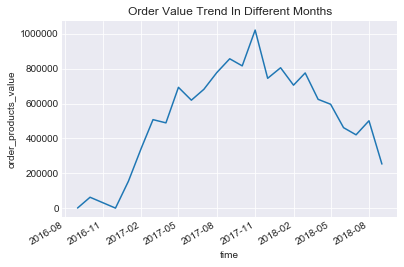

In [9]:
df.groupby('time').order_products_value.sum().plot()
plt.title("Order Value Trend In Different Months")
plt.ylabel("order_products_value")

2017年开始，商品销售额逐渐上升，并且在2017年11月份达到最高，之后逐渐下跌。

### 商品销售额与订单内商品数量的关系

Text(0.5,1,'Relationship Between Order_products_value and Order_items_qty')

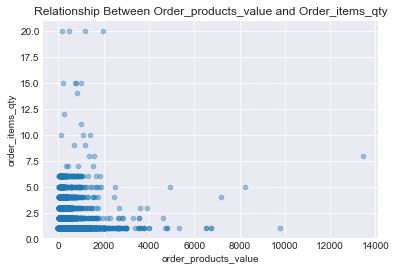

In [10]:
df.plot(x  = "order_products_value", y = "order_items_qty", 
        kind = "scatter",alpha = 0.4)
plt.title("Relationship Between Order_products_value and Order_items_qty")

### 以顾客为数据粒度，商品销售额与订单内商品数量的关系

Text(0.5,1,'Relationship Between Order_products_value and Order_items_qty By Customer Id')

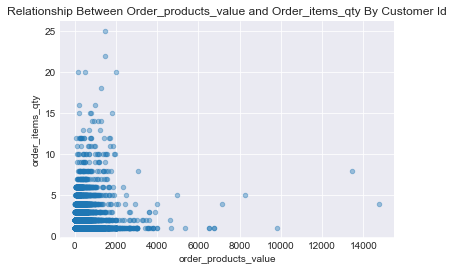

In [11]:
df.groupby('customer_unique_id').sum().plot(x ='order_products_value',y ='order_items_qty', 
                                            kind = "scatter", alpha = 0.4 )
plt.title("Relationship Between Order_products_value and Order_items_qty By Customer Id")

### 分析每个用户的消费能力

Text(0.5,0,'Customer Counts')

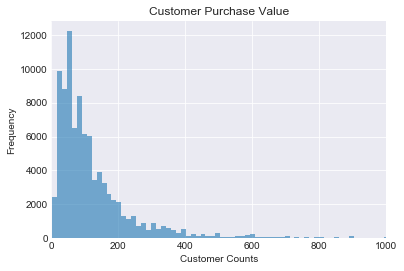

In [12]:
df.groupby('customer_unique_id').sum().order_products_value.plot(kind='hist',bins=1000,
                                                                 xlim=(0,1000), alpha = 0.6)
plt.title("Customer Purchase Value")
plt.xlabel("Customer Counts")

按照顾客的累积消费金额为标准，查看在这个网站上购买的用户贡献度，一些顶级用户贡献了极大销售金额，整个分布成长尾趋势。

Text(0.5,1,'Customer Purchase Value In Top 200')

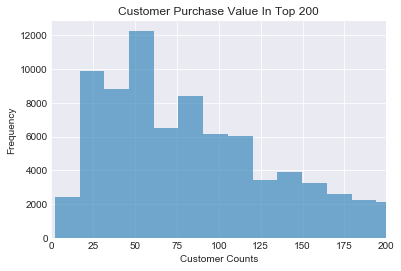

In [13]:
df.groupby('customer_unique_id').sum().order_products_value.plot(kind='hist',bins=1000,xlim=(0,200), 
                                                                 alpha = 0.6)
plt.xlabel("Customer Counts")
plt.title("Customer Purchase Value In Top 200")

将坐标轴换成0到200，查看头部顾客贡献的分布状况

In [14]:
ARPU = df["order_products_value"].sum()/df['customer_unique_id'].count()
ARPU

129.19968724370389

按照从2016年8月到2018年9月这个时间段来说，从每个用户所贡献的营业额平均为129.1917036

### 商品的复购率

In [15]:
pivoted_counts = df.pivot_table(index = 'customer_unique_id',columns = 'time',
                                values = 'order_aproved_at',aggfunc = 'count').fillna(0)

In [16]:
pivoted_counts_tran = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)

此处的复购率，是将月作为时间划分单位之后，在此期间内消费了两次及以上的用户在总体用户中的占比。

将数据转换一下，消费两次及以上记为1，消费一次记为0，没有消费记为NaN。


Text(0.5,1,'Rate For Purchasing')

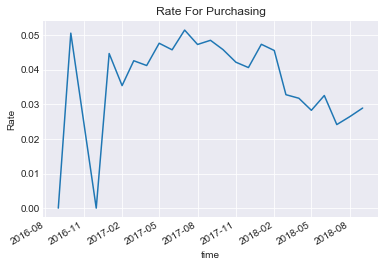

In [17]:
(pivoted_counts_tran.sum()/pivoted_counts_tran.count()).plot()

plt.ylabel("Rate")
plt.title("Rate For Purchasing")

In [18]:
df.query('time == "2016-12"')["order_id"].count()

3

In [19]:
df.query('time == "2016-10"')["order_id"].count()

424

复购率的整体不是很高，最高5%的比例，也就是说每个顾客购买两次以上的频率并不高。

在早期有一个非常大的峰值，之后再2017-01月有一个接近为0的低谷，这说明这时候之前购买的顾客都没有再在此平台上面购买东西。

将2016年12月份的所有交易记录调出来发现，这个月只有3笔订单，这就是出现低谷的原因。接下来需要去寻找到这个月订单量异常小的原因。

在2017-07月开始，慢慢有些下滑，说明部分老客开始流失，注意对这些顾客的维护工作，比如提供更多的会员福利和更大的会员折扣力度，或者是通过sms和邮件通知的形式，引起顾客的注意，让他们保持购买的习惯

### 用户生命周期

In [20]:
(df.groupby('customer_unique_id').order_aproved_at.max() - df.groupby('customer_unique_id').order_aproved_at.min()).describe()

count                       92499
mean       3 days 02:55:25.684266
std       27 days 06:46:19.736040
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%               0 days 00:00:00
max      666 days 22:42:39.096966
Name: order_aproved_at, dtype: object

用户生命周期的平均值在3天，在电商领域，其实是一个非常低的数字，

但是olist是一个非常多的小店聚集的综合电商平台，所以这个只是一个总体的状况。

Text(0.5,1,'Customer Lifetime for Olist')

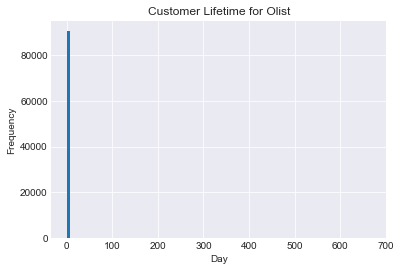

In [21]:
((df.groupby('customer_unique_id').order_aproved_at.max() - df.groupby('customer_unique_id').order_aproved_at.min())/np.timedelta64(1,'D')).plot(kind = "hist",bins=100)

plt.xlabel("Day")
plt.title("Customer Lifetime for Olist")

大部分的用户生命周期都是0天，这说明只消费了一次的新客非常的多，

接下来将只消费了一次的新客排除在外，看一下购买过两次及两次以上的顾客的分布特征。

Text(0.5,1,'Customer Lifetime for Olist Without New Customer')

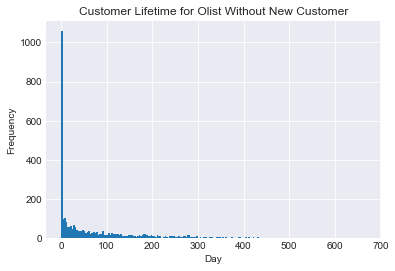

In [22]:
life_time =(df.groupby('customer_unique_id').order_aproved_at.max() - df.groupby('customer_unique_id').order_aproved_at.min())/np.timedelta64(1,'D')

life_time[life_time > 0].hist(bins=200)

plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("Customer Lifetime for Olist Without New Customer")

依然是非常多的顾客是只购买了一次，在生命周期为0的地方是最高的，之后是慢慢下降的趋势。

就说明，从电商集合店olist总体的状况来看，非常多的顾客是200天后流失了。

### 顾客留存

In [23]:
user_purchase = df[["customer_unique_id","order_id","order_products_value","order_aproved_at"]]

user_retention = pd.merge(left= user_purchase,right = df.groupby('customer_unique_id').order_aproved_at.min().reset_index(),
                          how='inner',on='customer_unique_id',suffixes=('_max','_min'))



In [24]:
user_retention.head()

,customer_unique_id,order_id,order_products_value,order_aproved_at_max,order_aproved_at_min
0,ac0e5d7f07043dd32831bdad3b99ad26,bdbeac23af8ee5dc1481782eaca3c24e,15.0,2018-01-30 04:31:19.335683,2018-01-30 04:31:19.335683
1,4ed24aaed4079fe0661c0e4b3b420dff,e12e86e5dbfcb5d2820427e70fd658f3,72.9,2017-09-12 04:25:20.792749,2017-09-12 04:25:20.792749
2,7e0e291c0f4fc2d69208954d26ed0586,5f79b5b0931d63f1a42989eb65b9da6e,89.8,2017-11-14 16:35:32.819244,2017-11-14 16:35:32.819244
3,ff1dcb27ea444eddb94ea5fea77b875c,a44895d095d7e0702b6a162fa2dbeced,54.9,2017-07-16 09:55:12.192935,2017-07-16 09:55:12.192935
4,237130c4b6717031ed62d9d0b16fd94f,faa51eb71627968952ed4dd55f0979cb,32.5,2017-08-22 04:26:34.365742,2017-08-22 04:26:34.365742


In [25]:
user_retention['diff'] = (user_retention['order_aproved_at_max'] - user_retention['order_aproved_at_min']).apply(lambda x:x/np.timedelta64(1,'D'))

In [26]:
user_retention.head()

,customer_unique_id,order_id,order_products_value,order_aproved_at_max,order_aproved_at_min,diff
0,ac0e5d7f07043dd32831bdad3b99ad26,bdbeac23af8ee5dc1481782eaca3c24e,15.0,2018-01-30 04:31:19.335683,2018-01-30 04:31:19.335683,0.0
1,4ed24aaed4079fe0661c0e4b3b420dff,e12e86e5dbfcb5d2820427e70fd658f3,72.9,2017-09-12 04:25:20.792749,2017-09-12 04:25:20.792749,0.0
2,7e0e291c0f4fc2d69208954d26ed0586,5f79b5b0931d63f1a42989eb65b9da6e,89.8,2017-11-14 16:35:32.819244,2017-11-14 16:35:32.819244,0.0
3,ff1dcb27ea444eddb94ea5fea77b875c,a44895d095d7e0702b6a162fa2dbeced,54.9,2017-07-16 09:55:12.192935,2017-07-16 09:55:12.192935,0.0
4,237130c4b6717031ed62d9d0b16fd94f,faa51eb71627968952ed4dd55f0979cb,32.5,2017-08-22 04:26:34.365742,2017-08-22 04:26:34.365742,0.0


将时间分段，查看在不同时间段内的顾客留存趋势。

获得用户每一次消费距第一次消费的时间差值,

将时间差值分桶，这里分成0～3天内，3～7天内，7～15天等，

代表用户当前消费时间距第一次消费属于哪个时间段呢。这里date_diff=0并没有被划分入0～3天，

因为计算的是留存率，如果用户仅消费了一次，留存率应该是0。另外一方面，如果用户第一天内消费了多次，但是往后没有消费，也算作留存率0。

In [27]:
user_retention['diff_bin']= pd.cut(user_retention['diff'],bins=[0,3,7,15,60,90,180,365])

user_retention.describe()

,order_products_value,diff
count,99982.000000,99982.000000
mean,129.199687,3.374636
std,194.877564,27.958847
min,2.000000,0.000000
25%,46.990000,0.000000
50%,83.790000,0.000000
75%,145.900000,0.000000
max,13440.000000,666.946286


Text(0.5,1,'Customer Purchase Diff Bin')

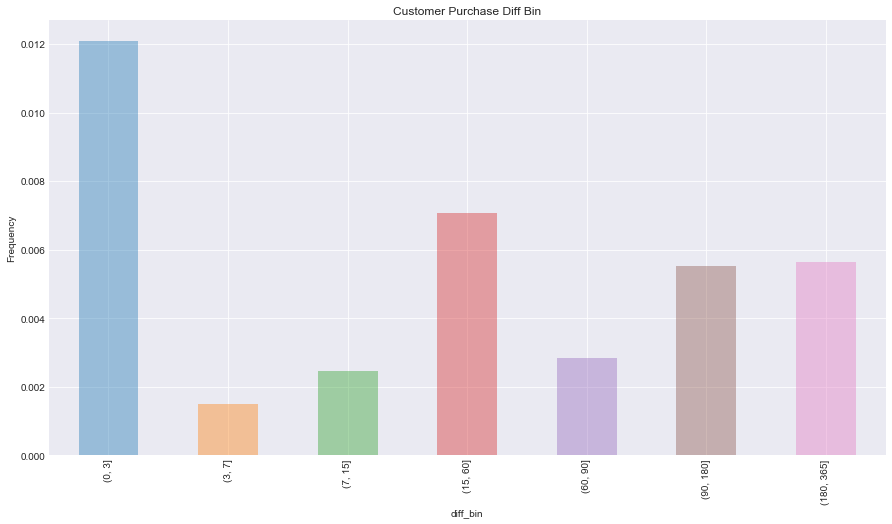

In [28]:
pivoted = user_retention.pivot_table(index='customer_unique_id',columns='diff_bin',
                                     values='order_products_value',aggfunc=sum)

pivoted_trans = pivoted.fillna(0).applymap(lambda x:1 if  x>0 else 0)

(pivoted_trans.sum()/pivoted_trans.count()).plot(kind='bar',alpha = 0.4,figsize = (15,8))

plt.ylabel("Frequency")
plt.title("Customer Purchase Diff Bin")

绝大多数的顾客是在0-3天的区间内，少部分的在15-60天和180天到365天，

这说明olist电商平台上顾客的留存与之前的观察是一致的，整个电商平台对顾客的留存率重视度不够，可能没有足够的措施保证留存率。

### 消费间隔

In [29]:
def diff(group):
    d = group["diff"] - group["diff"].shift(-1)
    return d

last_diff = user_retention.groupby("customer_unique_id").apply(diff)
last_diff.head()

customer_unique_id                     
000329c0b406d30f7e92fbd6a88a009e  55781   NaN
0003418b36ed466545169cac383b59b4  43485   NaN
000446ff827ee6397d0f00816d6a1fb2  45882   NaN
0004983adf3647e6c0bf708af02e94e4  50054   NaN
0004e8eb194ba10ce76319ad18b09a5c  20071   NaN
Name: diff, dtype: float64

In [30]:
last_diff.mean()

-0.6879337646617943

Text(0.5,1,'User Retention Time Priod')

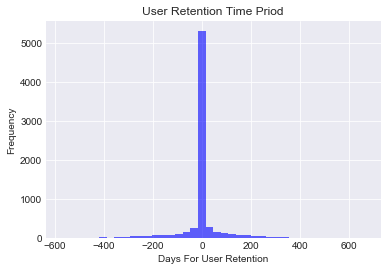

In [31]:
last_diff.plot(kind = "hist", bins = 40, color = "blue", alpha = 0.6)

plt.xlabel("Days For User Retention")

plt.title("User Retention Time Priod")

使用mean函数求出消费间隔为0.688天，

消费间隔可以说明网站内顾客消费的周期平均值，以此来判断什么时候对这些顾客进行召回。

结合之前的内容来看，有关召回的营销策略需要与顾客留存的营销策略一起做，先调查是什么引起了顾客的大量流失，

以及为什么顾客的对网站的粘度不够，是产品的问题，还是店铺运营的问题。

### RFM顾客价值模型

In [32]:
recency_value  = df["order_aproved_at"].groupby(df.index).max()
frequency_value = df["order_aproved_at"].groupby(df.index).count()
monetary_value = df["order_products_value"].groupby(df.index).sum()

In [33]:
df["time"].max()

Timestamp('2018-09-01 00:00:00')

In [34]:
#将区间划分为2份，从0到1，为差到好

deadline_date = df["time"].max()
r_interval = (deadline_date - recency_value).dt.days
r_score = pd.cut(r_interval, 2, labels = [1,0])
f_score = pd.cut(frequency_value, 2, labels = [0,1])
m_score = pd.cut(monetary_value, 2, labels = [0,1])

In [35]:
rfm_list = [r_score, f_score, m_score]
rfm_cols = ["r_score","f_score","m_score"]
rfm_pd = pd.DataFrame(np.array(rfm_list).transpose(), columns = rfm_cols,
                      index = frequency_value.index)

In [36]:
rfm_pd.head()

,r_score,f_score,m_score
0,1,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [37]:
#第一种方法：加权得分

#与业务探讨后的权重值,活跃度为0.6，消费频率为0.3，消费金额为0.1

#rfm_pd["rfm_wscore"] = rfm_pd["r_score"] * 0.6 + rfm_pd["f_score"] * 0.3 + rfm_pd["m_score"] * 0.1

In [38]:
#第二种方法：组合得分
rfm_pd_tmp = rfm_pd.copy()
rfm_pd_tmp["r_score"] = rfm_pd_tmp["r_score"].astype("str")
rfm_pd_tmp['f_score'] = rfm_pd_tmp['f_score'].astype('str')
rfm_pd_tmp['m_score'] = rfm_pd_tmp['m_score'].astype('str')
rfm_pd_tmp['rfm_comb'] = rfm_pd_tmp['r_score'].str.cat(rfm_pd_tmp['f_score']).str.cat(rfm_pd_tmp['m_score'])

In [39]:
rfm_pd_tmp.head()

,r_score,f_score,m_score,rfm_comb
0,1,0,0,100
1,0,0,0,000
2,1,0,0,100
3,0,0,0,000
4,0,0,0,000


In [40]:
rfm_pd_tmp.describe()

,r_score,f_score,m_score,rfm_comb
count,99982,99982,99982,99982
unique,2,1,2,4
top,1,0,0,100
freq,62867,99982,99976,62863


In [41]:
#make bar plot 制作绘制条形图的函数

def bar_plot(columns):
    rfm_pd_tmp[columns].value_counts().plot(kind = "bar", alpha = 0.6)
    plt.xlabel(columns)
    plt.ylabel('Count')
    plt.title('Value_counts for {}'.format(columns))
          
    return None

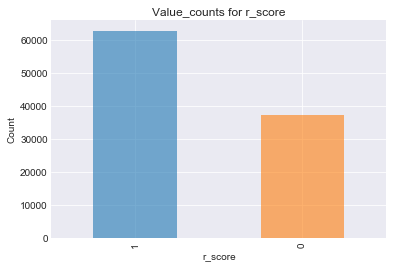

In [42]:
#购买时间r的得分分布
bar_plot("r_score")

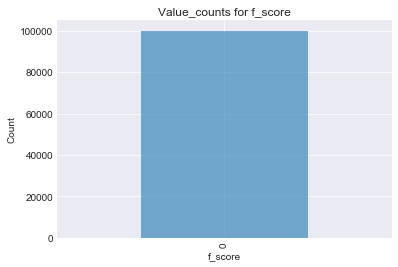

In [43]:
#购买频率f的得分分布
bar_plot("f_score")

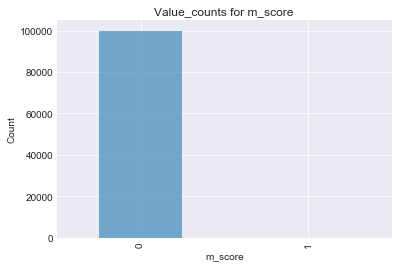

In [44]:
#购买金额m的得分分布
bar_plot("m_score")

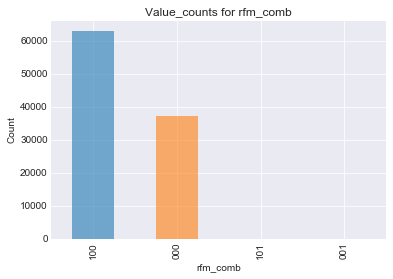

In [45]:
#组合得分后的分布
bar_plot("rfm_comb")

In [46]:
df_rfm = rfm_pd_tmp.groupby(['rfm_comb'])['r_score'].count().reindex(['111','011','001','101','110','100','010','000'])
df_rfm = df_rfm.rename(index={'111':'重要价值客户','011':'重要唤回客户','101':'重要深耕客户','001':'重要挽回客户',
                     '110':'潜力客户','010':'一般维持客户','100':'新客','000':'流失客户'})

In [47]:
df_rfm

rfm_comb
重要价值客户        NaN
重要唤回客户        NaN
重要挽回客户        2.0
重要深耕客户        4.0
潜力客户          NaN
新客        62863.0
一般维持客户        NaN
流失客户      37113.0
Name: r_score, dtype: float64

rfm模型中观察到的趋势与顾客生命周期中的一致，

新客占比非常大，流失的客户也非常多，能够算作重要的客户极少，

从产品上来看，说明网站的吸引力和粘性不够；

从策略上来看，olist的留存力度不够。